# Question 1 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
# import necessary modules
import numpy as np
from SolveLinear import GaussElim
from time import time
from numpy.linalg import solve #LU Decomp
import matplotlib.pyplot as plt

# Part A

Here we want to modify the given $\texttt{SolveLinear.py}$ module (see file) to incorporate partial pivoting. The following code was added into the module:

Inside $\texttt{GaussElim()}$:
```python
...
    for m in range(N):
        # Divide by the diagonal element
        if pivot == True: PartialPivot(A,v,m)
        div = A[m, m]
        A[m, :] /= div
        v[m] /= div
...
```

Define separate function $\texttt{PartialPivot()}$:
```python
def PartialPivot(A, v, i):
    """ Perform Partial Pivoting of a Matrix 
    INPUT: Matrix, vector for which to solve, index of current row
    OUTPUT: nothing (simply modifies input Matrix)
    i = index of row on which to do the partial pivoting
    """
    N = dim(v) # Save dimension of vector
    k = i + 1 # Set counter to check all rows starting at index below ith row
    
    # We now compare the mth element of the mth row with all other mth elements
    # in the rows below. End when we reach the end (index + 1 = dim(v))
    while k < N:
        if (abs(A[i,i]) < abs(A[k,i])):
        # if the lower row has a larger mth element value, switch the two rows
            A[i,:], A[k,:] = copy(A[k,:]), copy(A[i,:]) # switch matrix
            v[i], v[k] = copy(v[k]), copy(v[i]) # switch vector
        k += 1 # increment counter
```

As a test that our newly introduced Partial Pivoting function works correctly, we use the same example as given in the textbook and compute the same answer twice, once with pivoting on and once with pivoting off.

In [2]:
# Define Matrix A and vector v
A = np.array([[2,1,4,1],
             [3,4,-1,-1],
             [1,-4,1,5],
             [2,-2,1,3]], float)
v = np.array([-4,3,9,7],float)

# Test WITHOUT Partial Pivoting
print('x WITHOUT pivoting: ', GaussElim(A,v))
# Test WITH Partial Pivoting
print('x WITH pivoting: ', GaussElim(A,v,pivot=True))

x WITHOUT pivoting:  [ 2. -1. -2.  1.]
x WITH pivoting:  [ 2. -1. -2.  1.]


Hurrah! It works. We will now test this more thouroughly in the following section Part B.

# Part B

We will now test the accuracy and timing of our new Gaussian Elimination method with Partial Pivoting. To do this we want a program that creates random matrices and vectors of arbitrary dimension N, and then finds the solution using 3 different methods, Gaussian Elimination, Partial Pivoting, and LU decomposition. We will time each method and compare them graphically. We will also verify that the solutions are correct by taking the difference between A*x, the matrix multiplied by the solution, and the original input vector v. We want to make sure that the difference is sufficiently small. We will repeat this for a range of N from 5 to 500.

Note: This will take some significant computation time... 

First initial arrays to store computation times and errors for each method

In [3]:
# Create an array of N values from 5 to 500. Take a step size
# between them of 5, otherwise this will take WAY too long
N_array = np.arange(5,500,5)

# Create arrays for calculation times for each method
t_gauss = np.empty(len(N_array))
t_piv = np.empty(len(N_array))
t_lu = np.empty(len(N_array))

# Create arrays for errors for each method
err_gauss = np.empty(len(N_array))
err_piv = np.empty(len(N_array))
err_lu = np.empty(len(N_array))

Now define a function to do the calculations with the ability to specify the method. The function will record the time it takes to find the solution as well the total error in the solution. This will significantly reduce the amount of code we have to write.

In [4]:
def doCalculations(method,timearray,errorarray,A,v,i):
    ''' Function to test the three different solving methods
    Does the calculation specified, times it, and calculates
    the error, saving everything in arrays
    INPUT: the calculation method to compute [gauss,piv,lu]
        time array to save values, error array to save values,
        matrix A and vector v we are solving for, current 
        dimension index we are looping over (for array values)
    OUTPUT: no output, saves all values into imputted arrays'''
    
    if method == 'gauss':
        start = time() # record initial time
        x = GaussElim(A,v) # solve WITHOUT pivot
        end = time() # record end time
    elif method == 'piv':
        start = time() # record initial time
        x = GaussElim(A,v,pivot=True) # solve WITH pivot
        end = time() # record end time
    elif method == 'lu':
        start = time() # record initial time
        x = solve(A,v) # solve with LU decomp through np.linalg
        end = time() # record end time
    else: print('ERROR: Invalid computation method :(')
    
    # save total computation time and store in array
    diff = end-start
    timearray[i] = diff
        
    # Now check the validity of the answer
    # Use numpy.dot with caluclated x to reconstruct v
    # save error between reconstructed and true v as error
    v_calc = np.dot(A,x) # vector multiplication
    err = np.mean(abs(v_calc - v)) # calculate difference
    errorarray[i] = err # store the error value in array

We now have everything we need to test each method. We will cycle through all the dimensions. THIS WILL TAKE A LONG TIME - SEVERAL SECONDS! (If we want to reduce the time, simply lower end value of the N_array defined at the start of Part B. We call the function defined above for each method looping over all the dimensions, saving the values to the previously initialized arrays.

In [5]:
# Now create a random array for each N value and solve using 
# the 3 methods, recording the imformation in above arrays
for i in range(len(N_array)): # loop over all dimensions
    N = N_array[i] #save current dimension
    # Create random matrix and vector using numpy.random
    A = np.random.rand(N,N)
    v = np.random.rand(N)
    
    # Now solve using the three different methods
    doCalculations('gauss',t_gauss,err_gauss,A,v,i)
    doCalculations('piv',t_piv,err_piv,A,v,i)
    doCalculations('lu',t_lu,err_lu,A,v,i)

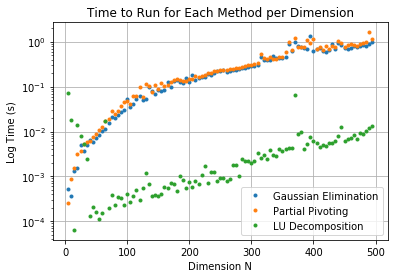

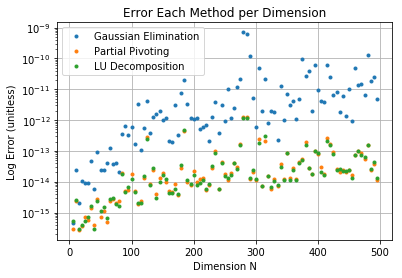

In [6]:
# Plot the Results!

# Plot the calculation times for each method
plt.figure(1)
plt.plot(N_array,t_gauss, '.', label='Gaussian Elimination')
plt.plot(N_array,t_piv, '.', label='Partial Pivoting')
plt.plot(N_array,t_lu, '.', label='LU Decomposition')
plt.title('Time to Run for Each Method per Dimension')
plt.xlabel('Dimension N')
plt.ylabel('Log Time (s)')
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.show()

# Plot the errors for each method
plt.figure(2)
plt.plot(N_array,err_gauss, '.', label='Gaussian Elimination')
plt.plot(N_array,err_piv, '.', label='Partial Pivoting')
plt.plot(N_array,err_lu, '.', label='LU Decomposition')
plt.title('Error Each Method per Dimension')
plt.xlabel('Dimension N')
plt.ylabel('Log Error (unitless)')
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.show()

The most striking observation is the speed of the LU decomposition. Both the optimization by numpy and the inherent quickness of the LU decomposition method results in much faster computations. As a result, LU decompositions is faster than both of the other 2 methods by ~2 orders of magnitude. The Gaussian Elimination and Partial Pivoting have more similar run times to each other, with the Partial Pivoting being slightly slower (makes sense because it is the same code but with an extra function in the middle to switch lines around!).

We notice however that even though the Partial Pivoting method is slightly slower, it is much more accurate than Gaussian elimination, on average 2 orders of magnitude more accurate, which is significant. The errors from Partial Pivotting are usually comparable to LU decomposition, they are both reliable. Normal Gaussian Elimination on the other hand introduces errors as discussed in Newman in situations where the algorithm breaks down. If left uncorrected (or at the very least not treated with care), these erros can be dangerous.

# Part C

In this section we want to apply what we did above to a specific example, to solve the following system:

\begin{align}
\Big( \frac{1}{R_1} + \frac{1}{R_4} + i \omega C_1 \Big)x_1 - i \omega C_1 x_2 &= \frac{x_+}{R_1} \\
-i \omega C_1 x_1 + \Big( \frac{1}{R_2} + \frac{1}{R_5} + i \omega C_1 + i \omega C_2 \Big)x_2 - i \omega C_2 x_3 &= \frac{x_+}{R_2} \\
-i \omega C_2 x_2 + \Big( \frac{1}{R_3} + \frac{1}{R_6} + i \omega C_2 \Big)x_3 &= \frac{x_+}{R_3}
\end{align}

where
\begin{align}
R_1 &= R_3 = R_5 = 1k\Omega \\
R_2 &= R_4 = R_6 = 2k\Omega \\
C_1 &= 1\mu F \text{  ,  } C_2 = 0.5\mu F \\
x_+ &= 3V \text{  ,  } \omega = 1000 rad.s^{-1}
\end{align}

When we plug in the values into the above system (and removing units), we arrive at the following matrix:
\begin{align}
(1.5 + 1000 i) x_1 − (1000 i) x_2 + 0 x_3 &= 3 \\
(− 1000 i) x_1 + (1.5 + 1500 i) x_2 − (500 i) x_3 &= 1.5 \\
0 x_1 + (− 500 i) x_2 + (1.5 + 500 i) x_3 &= 3
\end{align}

We will use partial pivoting to solve this matrix.

In [7]:
# Given Constant
w = 1000.

# Define matrix (note we fix for kilo units)
A = np.array([[0.0015 + 0.001j, -0.001j, 0.],
              [-0.001j, 0.0015 + 0.0015j, -0.0005j],
              [0., -0.0005j, 0.0015 + 0.0005j]], dtype=complex)
# Define vector
v = np.array([0.003, 0.0015, 0.003], dtype=complex)
# Perform Gaussian elimination with partial pivoting
x = GaussElim(A, v, pivot=True)

If we want to print the amplitudes and phases of the voltages V_1, V_2, and V_3, we note that the amplitudes are given by the magnitudes of x components, and the phase by the argument (remember x has 3 complex components corresponding to the three voltages)

In [8]:
print("\nAmplitudes are:\n|V1| = {0}\n|V2| = {1}\n|V3| = {2}".
      format(abs(x[0]), abs(x[1]), abs(x[2])))
print("\nPhases (in degrees) are:\nx1: {0}\nx2: {1}\nx3: {2}".
      format(np.angle(x[0]), np.angle(x[1]), np.angle(x[2])))


Amplitudes are:
|V1| = 1.7014390658777336
|V2| = 1.4806053465364062
|V3| = 1.8607693200562132

Phases (in degrees) are:
x1: -0.09545371433271428
x2: 0.20216879328855675
x3: -0.07268725004282395


This answer makes sense, the values of the phases should all be 0 at t=0 because they are at their initial values! But what if we evolve in time?

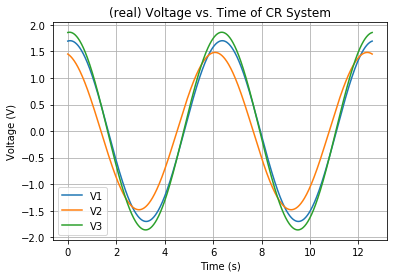

In [9]:
# define array for time values over 2 periods
t = np.linspace(0, 4*np.pi, 1000)

# Set the voltages at points 1,2,3 for the RC system
V1 = x[0] * np.exp(1j*w*t) # set V1
V2 = x[1] * np.exp(1j*w*t) # set V2
V3 = x[2] * np.exp(1j*w*t) # set V3

# Plot the evolution of V1,V2,V3
plt.figure(3)
plt.plot(t,np.real(V1), label='V1')
plt.plot(t,np.real(V2), label='V2')
plt.plot(t,np.real(V3), label='V3')
plt.title('(real) Voltage vs. Time of CR System')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()

As we would expect the system does not change too much over time, they all have the same period. Their phases and amplitudes are slightly different, however nothing too obvious. Now let's consider a more complicated LCR circuit and see how it evolves in time. In this case, $L=R_6/\omega=2$. When we make this substitution we only affect the entry that uses $R_6$, the [3,3] index of our matrix (see system of equations above). Now let's follow through the same steps and see what happens:

In [10]:
# Doing the same thing for the LCR system

# here we change A slightly in the [3,3] index to include inductor
A2 = np.array([[0.0015 + 0.001j, -0.001j, 0.],
              [-0.001j, 0.0015 + 0.0015j, -0.0005j],
              [0., -0.0005j, 0.501 + 0.0005j]], dtype=complex)
x2 = GaussElim(A2, v, pivot=True) # perform calcualtion

# Print the amplitudes and Phases as before
print("\nAmplitudes are:\n|V1| = {0}\n|V2| = {1}\n|V3| = {2}".
      format(abs(x2[0]), abs(x2[1]), abs(x2[2])))
print("\nPhases (in degrees) are:\nx1: {0}\nx2: {1}\nx3: {2}".
      format(np.angle(x2[0]), np.angle(x2[1]), np.angle(x2[2])))


Amplitudes are:
|V1| = 1.8118131730617226
|V2| = 1.216195243615469
|V3| = 0.006140617817148857

Phases (in degrees) are:
x1: -0.20660105272164367
x2: -0.025976930162665845
x3: 0.1979063058393541


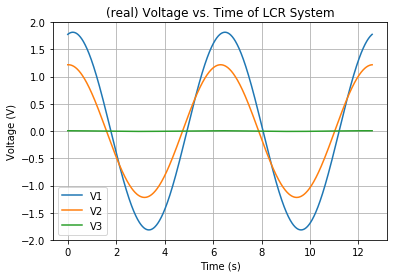

In [11]:
# Set the voltages at points 1,2,3 for the LCR system
V1_LCR = x2[0] * np.exp(1j*w*t)
V2_LCR = x2[1] * np.exp(1j*w*t)
V3_LCR = x2[2] * np.exp(1j*w*t)

# Plot the functions over time
plt.figure(4)
plt.plot(t,np.real(V1_LCR), label='V1')
plt.plot(t,np.real(V2_LCR), label='V2')
plt.plot(t,np.real(V3_LCR), label='V3')
plt.title('(real) Voltage vs. Time of LCR System')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()

This time, the amplitudes for the voltages vary much more. In fact, the amplitude of V3 is so small that it is indistinguishable from 0. The phases also remain different. Finally, we will briefly show the impact of making the indctor purely imaginary. In this case, it can be shown that the [3,3] entry once again changes such that:

In [12]:
# Doing the same thing for the LCR system but imaginary inductor

# here we change A slightly in the [3,3] index to include imaginary inductor
A3 = np.array([[0.0015 + 0.001j, -0.001j, 0.],
              [-0.001j, 0.0015 + 0.0015j, -0.0005j],
              [0., -0.0005j, 0.001 + 0.0045j]], dtype=complex)
x3 = GaussElim(A3, v, pivot=True) # perform calcualtion

# Print the amplitudes and Phases as before
print("\nAmplitudes are:\n|V1| = {0}\n|V2| = {1}\n|V3| = {2}".
      format(abs(x3[0]), abs(x3[1]), abs(x3[2])))
print("\nPhases (in degrees) are:\nx1: {0}\nx2: {1}\nx3: {2}".
      format(np.angle(x3[0]), np.angle(x3[1]), np.angle(x3[2])))


Amplitudes are:
|V1| = 1.8518015625257618
|V2| = 1.3618335485550748
|V3| = 0.6724407523549473

Phases (in degrees) are:
x1: -0.16809646731193578
x2: -0.035524382143000764
x3: -1.1307985383847277


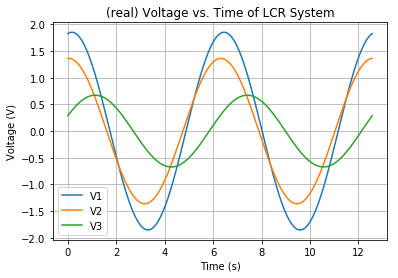

In [13]:
# Set the voltages at points 1,2,3 for the LCR system
V1_LCR3 = x3[0] * np.exp(1j*w*t)
V2_LCR3 = x3[1] * np.exp(1j*w*t)
V3_LCR3 = x3[2] * np.exp(1j*w*t)

# Plot the functions over time
plt.figure(4)
plt.plot(t,np.real(V1_LCR3), label='V1')
plt.plot(t,np.real(V2_LCR3), label='V2')
plt.plot(t,np.real(V3_LCR3), label='V3')
plt.title('(real) Voltage vs. Time of LCR System')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()

We find that the imaginary impedance of iR6 scales up the amplitudes so that they are all much more comparable as opposed to the impedance we saw before. The phases have also changed too, with the relative differences more noticeable.